In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
first_data = pd.read_csv("Analyzed/Maps/brc000d.map.csv")
second_data = pd.read_csv("Analyzed/Maps/brc501d.map.csv")
third_data = pd.read_csv("Analyzed/Maps/brc505d.map.csv")
fourth_data = pd.read_csv("Analyzed/Maps/den011d.map.csv")

In [22]:
# all_data = pd.concat([first_data, second_data, third_data, fourth_data])

In [2]:
k_param = '7[4]'
top_spin_data1 = pd.read_csv("Analyzed/TopSpin/{0}.csv".format(k_param))
k_param = '7[11]'
top_spin_data2 = pd.read_csv("Analyzed/TopSpin/{0}.csv".format(k_param))
k_param = '9[3]'
top_spin_data5 = pd.read_csv("Analyzed/TopSpin/{0}.csv".format(k_param))
k_param = '9[6]'
top_spin_data6 = pd.read_csv("Analyzed/TopSpin/{0}.csv".format(k_param))
k_param = '9[10]'
top_spin_data7 = pd.read_csv("Analyzed/TopSpin/{0}.csv".format(k_param))

# all_data = pd.concat([top_spin_data1, top_spin_data2, top_spin_data5, top_spin_data6, top_spin_data7])

In [2]:
# PANCAKE PROBLEM

num = 10
pancake_data10 = pd.read_csv("Analyzed/pancake_problem/{0}.csv".format(num))
num = 11
pancake_data11 = pd.read_csv("Analyzed/pancake_problem/{0}.csv".format(num))
num = 12
pancake_data12 = pd.read_csv("Analyzed/pancake_problem/{0}.csv".format(num))
num = 13
pancake_data13 = pd.read_csv("Analyzed/pancake_problem/{0}.csv".format(num))
num = 14
pancake_data14 = pd.read_csv("Analyzed/pancake_problem/{0}.csv".format(num))

all_data = pd.concat([pancake_data10, pancake_data11, pancake_data12, pancake_data13, pancake_data14])

In [3]:
# GET BY_W 
by_w = dict()
for w in all_data['wight'].unique():
    by_w[w] = all_data.loc[all_data['wight'] == w]

# GET BY_ITERATION
by_i = dict()
# unique_ws = first_data['wight'].unique()
# for iteration_number in first_data['random_point_iteration'].unique():
#     by_i[iteration_number] = first_data.loc[first_data['random_point_iteration'] == iteration_number]
    

In [12]:
# Average of C/C* and CExpanded/C*Expanded

averages_by_w = dict()
for w_in_by_w in by_w.keys():
    if w_in_by_w>20:
        break
    full_data_by_w = by_w[w_in_by_w]
    averages_by_w[w_in_by_w] = dict({
        "Average_C_CStar": np.average(full_data_by_w['sol / c*'].values),
        "Average_CExpanded_CStarExpanded": np.average(full_data_by_w['expanded_star'].values)
    })

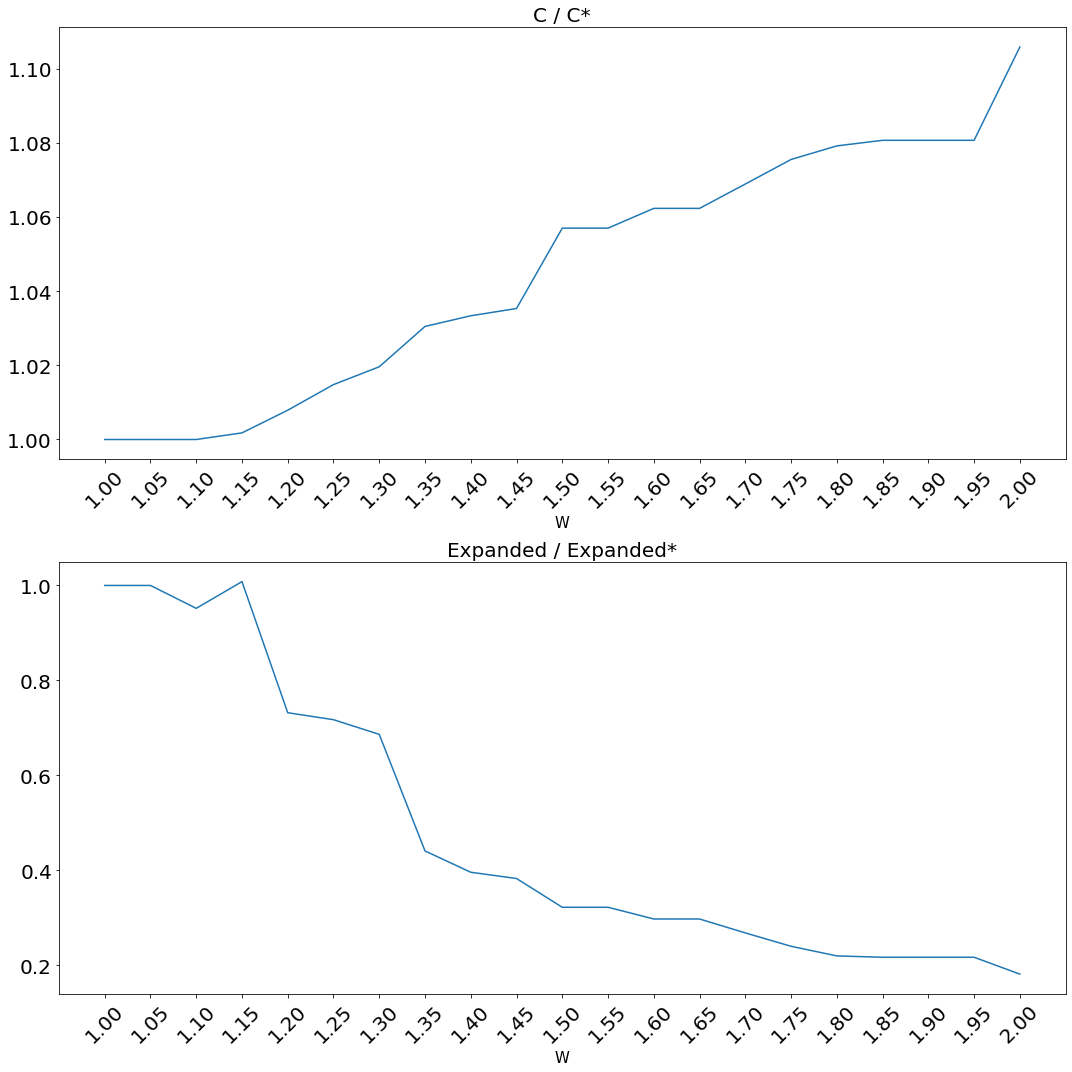

In [13]:
from matplotlib.ticker import MaxNLocator


Average_C_CStar_vector = []
Average_CExpanded_CStarExpanded_vector = []
for w in averages_by_w.keys():
    #  CREATE A VECTOR OF AVG EXPANDED
    Average_C_CStar_vector.append(averages_by_w[w]["Average_C_CStar"])
    #  CREATE A VECTOR OF AVG GENERATED
    Average_CExpanded_CStarExpanded_vector.append(averages_by_w[w]["Average_CExpanded_CStarExpanded"])

Average_C_CStar_vector = np.array(Average_C_CStar_vector)
Average_CExpanded_CStarExpanded_vector = np.array(Average_CExpanded_CStarExpanded_vector)
w = np.array(list(averages_by_w.keys()))

fig, axis = plt.subplots(2,1, figsize=(15,15))
axis[0].plot(w, Average_C_CStar_vector)
axis[1].plot(w, Average_CExpanded_CStarExpanded_vector)

x_int_ticks = [x for x in w]
axis[0].xaxis.set_ticks(x_int_ticks)
axis[1].xaxis.set_ticks(x_int_ticks)

axis[0].tick_params(axis='both', labelsize=20)
axis[0].tick_params(axis='x', labelsize=20, rotation=45)
axis[1].tick_params(axis='both', labelsize=20)
axis[1].tick_params(axis='x', labelsize=20, rotation=45)

axis[0].set_title("C / C*", fontsize=20)
axis[1].set_title("Expanded / Expanded*", fontsize=20)
axis[0].set_xlabel("W", fontsize=15)
axis[1].set_xlabel("W", fontsize=15)

# yint_tick = [x for x in w]

# plt.xticks(yint_tick)
plt.tight_layout()
plt.show()
fig.savefig("PancakesDomainSummation.png", dpi=300)

In [7]:
temp_data_frame = pd.DataFrame(data=Average_CExpanded_CStarExpanded_vector, columns=["t"])
temp_data_frame.to_csv("temp_data_frame.csv")

In [8]:
# AVERAGE NUM OF EXPANDED/GENERATED AND SOLUTION SIZE BY W  
averages_by_w = dict()
for w_in_by_w in by_w.keys():
    full_data_by_w = by_w[w_in_by_w]
    averages_by_w[w_in_by_w] = dict({
        "Avg_Expanded": np.average(full_data_by_w['num_of_expanded_nodes'].values),
        "Avg_Generated": np.average(full_data_by_w['num_of_gen_nodes'].values),
        "Avg_Solution_Size": np.average(full_data_by_w['solution_size'].values),
    })

In [9]:
expanded_avg_vector = []
generated_avg_vector = []
sol_size_avg_vector = []
for w in averages_by_w.keys():
    #  CREATE A VECTOR OF AVG EXPANDED
    expanded_avg_vector.append(averages_by_w[w]["Avg_Expanded"])
    #  CREATE A VECTOR OF AVG GENERATED
    generated_avg_vector.append(averages_by_w[w]["Avg_Generated"])
    #  CREATE A VECTOR OF AVG SOLUTION SIZE
    sol_size_avg_vector.append(averages_by_w[w]["Avg_Solution_Size"])
    
expanded_avg_vector = np.array(expanded_avg_vector)
generated_avg_vector = np.array(generated_avg_vector)
sol_size_avg_vector = np.array(sol_size_avg_vector)
w = np.array(list(averages_by_w.keys()))

In [10]:
temp_data_frame = pd.DataFrame(dict({
    'expanded_avg': expanded_avg_vector,
    'generated_avg': generated_avg_vector,
    'sol_size_avg': sol_size_avg_vector
}))
temp_data_frame.to_csv("temp_data_frame.csv")

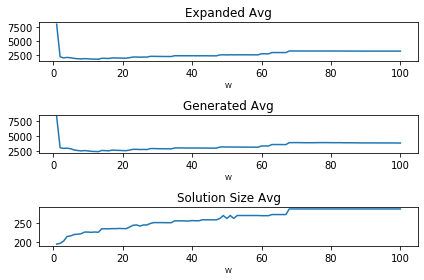

In [20]:
# PLOT THE W ABOUT THE EXPANDED/GENERATED/SOLUTION SIZE

fig, axis = plt.subplots(3,1)
axis[0].plot(w, expanded_avg_vector)
axis[1].plot(w, generated_avg_vector)
axis[2].plot(w, sol_size_avg_vector)
axis[0].set_title("Expanded Avg")
axis[1].set_title("Generated Avg")
axis[2].set_title("Solution Size Avg")
axis[0].set_xlabel("W", fontsize=7)
axis[1].set_xlabel("W", fontsize=7)
axis[2].set_xlabel("W", fontsize=7)
plt.tight_layout()
plt.show()
fig.savefig("first maze ;.png", dpi=300)

In [ ]:
iteration_data = by_i[2.0]
w = iteration_data.ix[:, 'wight']
solution_path_length = iteration_data.ix[:, 'solution_size']
expanded_nodes_vector = iteration_data.ix[:, 'num_of_expanded_nodes']
c_w = solution_path_length.values[0]

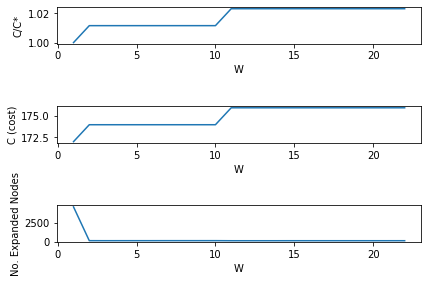

In [29]:
fig, axis = plt.subplots(3,1)
axis[0].plot(w, solution_path_length/c_w)
axis[0].set_ylabel("C/C*")
axis[0].set_xlabel("W")
axis[1].plot(w, solution_path_length)
axis[1].set_ylabel("C (cost)")
axis[1].set_xlabel("W")
axis[2].plot(w, expanded_nodes_vector)
axis[2].set_ylabel("No. Expanded Nodes")
axis[2].set_xlabel("W")

plt.tight_layout()
plt.show()
fig.savefig("test1.png", dpi=200)

In [35]:
np.average(solution_path_length/c_w)

1.050652639781804

In [1]:
import numpy as np
from TilePuzzleProblem import TrayTilePuzzle

def turn_to_str(tray: TrayTilePuzzle):
    np_array = np.copy(tray.tiles)
    convert_to_str = lambda x: str(int(x+1)) if x>=0 else '_'
    rows = []
    for row in np_array:
        col = []
        for val in row:
            str_rep = convert_to_str(val)
            col.append(str_rep)
        rows.append(col)
    return rows

test_tray = TrayTilePuzzle(number_of_tiles=16)
turn_to_str(test_tray)
    


|9.0,,0.0,,1.0,,2.0,,3.0,,4.0,,5.0,,6.0,,7.0,,8.0,|
|19.0,,10.0,,11.0,,12.0,,13.0,,15.0,,25.0,,16.0,,17.0,,18.0,|
|29.0,,20.0,,21.0,,22.0,,23.0,,14.0,,26.0,,36.0,,27.0,,28.0,|
|30.0,,40.0,,32.0,,42.0,,34.0,,24.0,,35.0,,46.0,,37.0,,38.0,|
|39.0,,41.0,,31.0,,52.0,,33.0,,44.0,,45.0,,56.0,,47.0,,48.0,|
|49.0,,50.0,,51.0,,53.0,,43.0,,54.0,,55.0,,66.0,,57.0,,58.0,|
|59.0,,60.0,,61.0,,62.0,,63.0,,64.0,,65.0,,76.0,,68.0,,78.0,|
|69.0,,70.0,,71.0,,72.0,,73.0,,74.0,,75.0,,77.0,,67.0,,88.0,|
|79.0,,80.0,,81.0,,82.0,,83.0,,84.0,,85.0,,86.0,,87.0,,98.0,|
|89.0,,90.0,,91.0,,92.0,,93.0,,94.0,,95.0,,96.0,,97.0,,-1.0,|


|-1.0,,0.0,,1.0,,2.0,,3.0,,4.0,,5.0,,6.0,,7.0,,8.0,|
|9.0,,10.0,,11.0,,12.0,,13.0,,14.0,,15.0,,16.0,,17.0,,18.0,|
|19.0,,20.0,,21.0,,22.0,,23.0,,24.0,,25.0,,26.0,,27.0,,28.0,|
|29.0,,30.0,,31.0,,32.0,,33.0,,34.0,,35.0,,36.0,,37.0,,38.0,|
|39.0,,40.0,,41.0,,42.0,,43.0,,44.0,,45.0,,46.0,,47.0,,48.0,|
|49.0,,50.0,,51.0,,52.0,,53.0,,54.0,,55.0,,56.0,,57.0,,58.0,|
|59.0,,60.0,,61.0,,62.0,,6

[['4', '1', '2', '_'],
 ['8', '6', '10', '3'],
 ['9', '5', '11', '7'],
 ['12', '13', '14', '15']]